# Sentiment Analysis on IMDB Movie Review dataset

Sentiment analysis is one of the key areas of research in NLP and Sequence modelling. We will be using LSTMs and Bi-directional LSTMs to predict two classes - positive or negative sentiment.


You will be reading the dataset from here: https://drive.google.com/file/d/127PCwycL0oToSF6l-c2oFuBkacYsmlgK/view?usp=sharing

You can use this blog for understanding: https://towardsdatascience.com/word-embeddings-for-sentiment-analysis-65f42ea5d26e

In [0]:
%tensorflow_version 1.x
import numpy as np 
import pandas as pd 
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Conv1D, Dropout, Bidirectional
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

TensorFlow 1.x selected.


Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


All the relevant libraries are imported. 
You are free to change as you please. 
Using the GPU backend is recommended as LSTMs are computationally expensive to train.



## Data handling - exploration and cleaning





1.   You are expected to read the dataset into a dataframe.
2.   This is a real world dataset and you will be expected to clean the dataset.

1.   This includes removing trailing spaces and HTML tags.






In [0]:
df = pd.read_csv('/content/drive/My Drive/IMDB Dataset.csv')
df.head(5).iloc[1][0]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

### Data Cleaning - write the techniques you employed and the achieved results

In [0]:
# WRITE CODE HERE
# Sample code:
df['review']=df['review'].str.replace(r'<[^>]*>', '') #html
df['review']=df['review'].str.replace(r'[s|es]+$', '') # removal of s / es  at the end
df['review']=df['review'].str.replace(r'<br />', '')
df['review']=df['review'].str.replace(r'[\"|\t|+]', '')
df['review']=df['review'].str.replace(r'[.|,]', ' ')
df['review']=df['review'].str.lower()
df['review']=df['review'].str.replace(r'[#!$%\^&\*;:{}=\-_`~()]', '')
df['review']=df['review'].str.replace(r'  ', ' ')

df['sentiment']=df['sentiment'].apply(lambda x:0 if x=='negative' else 1)

In [0]:
df.sample(2).iloc[1][0]

"if you liked the richard chamberlain version of the bourne identity then you will like this too  aiden quinn does this one brilliantly you can't help but wonder if he is really out there  i reckon he and the other main cast members probably had nightmares for weeks after doing this movie as it's so intense when i first saw it i was just flicking channels on the remote late one evening  i got hooked within minutes look up www answers com for ilich ramírez sánchez who is the character that carlos the jackal is based on for both  i remember reading about ilich ramírez sánchez's arrest in the paper in 1997 it was front page for weeks through the trial after his arrest "

(-0.5, 1199.5, 799.5, -0.5)

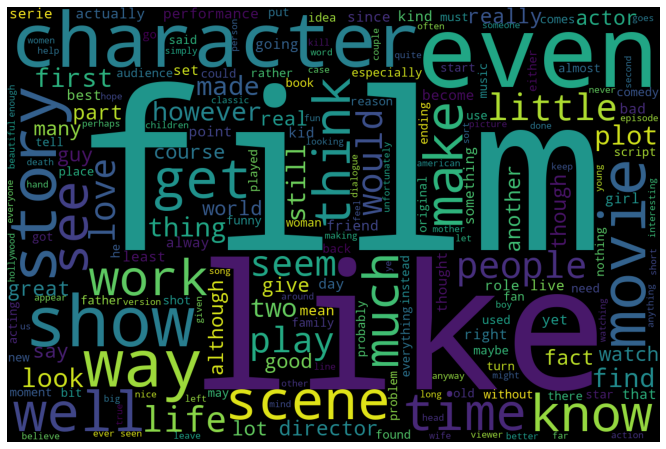

In [0]:
wordcloud = WordCloud(stopwords=stopwords.words(), width=1200, height=800).generate(' '.join(df['review']))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")

Write about the techniques used to clean:

### Data Exploration



1.   You are required to report the total number of distinct tokens present in the data set.
2.   Find out the minimum and max length of a review.

An integral part of visualization when it comes to textual data is the generating of a word cloud.

1.   
This task is open-ended and you can use any library of your choice. 
NLTK is one such library. 
2.   
Make sure to keep note of stop words.

##Example:


![alt text](https://getthematic.com/wp-content/uploads/2018/03/Harris-Word-Cloud-e1522406279125.png)




In [0]:
MAX_len=max(df['review'].apply(lambda x: len(x)))
MIN_len=min(df['review'].apply(lambda x: len(x)))
print('max->',MAX_len , 'Min->',MIN_len)
print('Total distinct tokens->',train_dict)

max-> 13320 Min-> 30
Total distinct tokens-> 135548


### Model processing

You can use a 70:30 train/test split.
The labels are 'positive' and negative, you should assign them integers 0 or 1 for further processing.

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df['review'], df['sentiment'], test_size=0.3)

text_tk = Tokenizer()
text_tk.fit_on_texts(X_train)

s_train = text_tk.texts_to_sequences(X_train)
s_test = text_tk.texts_to_sequences(X_test)

train_padded = sequence.pad_sequences(s_train, maxlen=500)
test_padded = sequence.pad_sequences(s_test, maxlen=500)

train_dict = len(text_tk.word_counts)

### Tokenizer
You will need to use fit a tokenizer over your training and testing data.

What does a tokenizer do?
It creates a dictionary of word to integer mappings. It updates internal vocabulary based on a list of texts. You should read up on the documentation before diving into the code. 

You will also be using the the text_to_sequence function will return integers based on a respective tokenizer.

Make sure you **pad** your sequences to max length using sequence.pad_sequences()




### Embedding layer
You will be importing the embedding layer from Keras.
Embedding layers are common place when handling textual data. 
Word embeddings provide a dense representation of words and their relative meanings.

#### How do they work - via Stack Overflow
Link: https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

The output vectors are not computed from the input using any mathematical operation. Instead, each input integer is used as the index to access a table that contains all posible vectors. That is the reason why you need to specify the size of the vocabulary as the first argument (so the table can be initialized).

The most common application of this layer is for text processing. Let's see a simple example. Our training set consists only of two phrases:

Hope to see you soon

Nice to see you again

So we can encode these phrases by assigning each word a unique integer number (by order of appearance in our training dataset for example). Then our phrases could be rewrittena as:

[0, 1, 2, 3, 4]

[5, 1, 2, 3, 6]

Now imagine we want to train a network whose first layer is an embeding layer. In this case, we should initialize it as follows:

Embedding(7, 2, input_length=5)

The first argument (7) is the number of distinct words in the training set. The second argument (2) indicates the size of the embedding vectors. The input_length argumet, of course, determines the size of each input sequence.

Once the network has been trained, we can get the weights of the embedding layer, which in this case will be of size (7, 2) and can be thought as the table used to map integers to embedding vectors.


### Model Engineering

You will be required to engineer three types of models from scratch.

1.   Using LSTMs
2.   Bi-directional LSTMs

1.   A model with less than 10,000 parameters - the lower the parameters, higher the score (provided accuracy is good)


For each model:

1.   You will be reporting graphs for validation accuracy and training loss.
2.   What hyper-parameters, loss functions, optimizations, initializations were used. This should be clearly stated in your analysis.

~90 percent and above is the desired accuracy. 

For model 3, CLEARLY report the number of parameters.




**Hyperparameters**

* Adam optimizer with default lr 0.001
* binary cross entropy loss
* Embedding of 20 vector for each word
* lstm with 200 units
* Dropout 
* Dense layer of 256 with activation tanh
* dropout
* final layer with sigmoid

In [0]:
# Some example code to help you get started
# X_train is your training data 
# input_dim is your dictionary length, output_dim is the length is the dimension of the dense embedding, 
# you can choose whatever works best for you, starting with 2.

input_dim=train_dict
output_dim=20
model = Sequential()
model.add(Embedding(input_dim, output_dim, input_length=train_padded.shape[1]))
model.add(LSTM(200))
model.add(Dropout(0.5))
model.add(Dense(256,activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 20)           2710960   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               176800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               51456     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 2,939,473
Trainable params: 2,939,473
Non-trainable params: 0
____________________________________________

In [0]:
history= model.fit(train_padded, Y_train, epochs= 4, batch_size=512,validation_split=0.1,verbose=1)


Train on 31500 samples, validate on 3500 samples
Epoch 1/4
31500/31500 [==============================] - 49s 2ms/step - loss: 0.6547 - accuracy: 0.5998 - val_loss: 0.4589 - val_accuracy: 0.7860
Epoch 2/4
31500/31500 [==============================] - 49s 2ms/step - loss: 0.3271 - accuracy: 0.8636 - val_loss: 0.2723 - val_accuracy: 0.8874
Epoch 3/4
31500/31500 [==============================] - 48s 2ms/step - loss: 0.1479 - accuracy: 0.9460 - val_loss: 0.2971 - val_accuracy: 0.8869
Epoch 4/4
31500/31500 [==============================] - 48s 2ms/step - loss: 0.0696 - accuracy: 0.9787 - val_loss: 0.3695 - val_accuracy: 0.8803


In [0]:
  def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

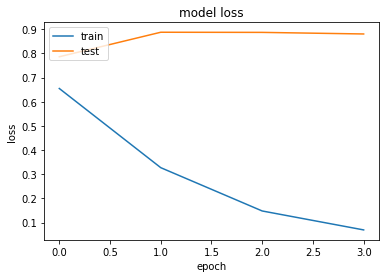

In [0]:
plot_loss(history)  

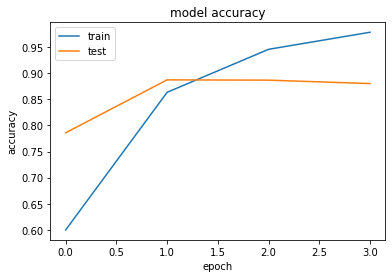

In [0]:
plot_accuracy(history)

**Bi-Directional LSTM**

**Hyperparameters**

* Adam optimizer with default lr 0.001
* binary cross entropy loss
* Embedding of 20 vector for each word
* Bidirecitonal lstm with 200 units
* Dropout 
* Dense layer of 256 with tanh activation
* dropout
* final layer with sigmoid

In [0]:
input_dim=train_dict
output_dim=20
model1 = Sequential()
model1.add(Embedding(input_dim, output_dim, input_length=train_padded.shape[1]))
model1.add(Bidirectional(LSTM(200)))
model1.add(Dropout(0.5))
model1.add(Dense(256,activation='tanh'))
model1.add(Dropout(0.5))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 20)           2710960   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               353600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               102656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 3,167,473
Trainable params: 3,167,473
Non-trainable params: 0
____________________________________________

In [0]:
history_bi = model1.fit(train_padded, Y_train, epochs= 4, batch_size=512,validation_split=0.1,verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/4
31500/31500 [==============================] - 89s 3ms/step - loss: 0.8396 - accuracy: 0.6228 - val_loss: 0.5963 - val_accuracy: 0.6597
Epoch 2/4
31500/31500 [==============================] - 89s 3ms/step - loss: 0.4821 - accuracy: 0.7784 - val_loss: 0.3821 - val_accuracy: 0.8266
Epoch 3/4
31500/31500 [==============================] - 89s 3ms/step - loss: 0.2226 - accuracy: 0.9131 - val_loss: 0.2778 - val_accuracy: 0.8920
Epoch 4/4
31500/31500 [==============================] - 89s 3ms/step - loss: 0.1104 - accuracy: 0.9636 - val_loss: 0.3057 - val_accuracy: 0.8897


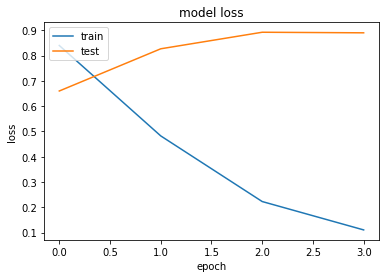

In [0]:
plot_loss(history_bi)

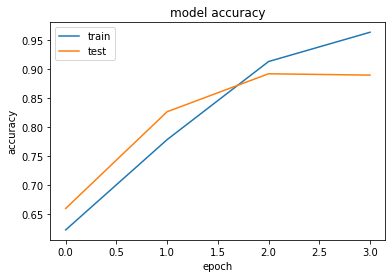

In [0]:
plot_accuracy(history_bi)  

**Modle with less parameters**

* Parameters : 9451
* embedding vector of 8 to represent each word
* used bidirectional lstm layer of 10 
* then drop out of 0.5 as regularzing effect 
* Adam optimizer with loss binary cross entropy

* 86% accuracy for training and validation 

In [0]:
input_dim=1000
output_dim=8
Lmodel = Sequential()
Lmodel.add(Embedding(input_dim, output_dim, input_length=train_padded.shape[1]))
Lmodel.add(Bidirectional(LSTM(10)))
Lmodel.add(Dropout(0.5))
Lmodel.add(Dense(1,activation='sigmoid'))
Lmodel.compile(optimizer='adam' , loss='binary_crossentropy' ,metrics=['accuracy'])
Lmodel.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 500, 8)            8000      
_________________________________________________________________
bidirectional_7 (Bidirection (None, 20)                1520      
_________________________________________________________________
dropout_9 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 21        
Total params: 9,541
Trainable params: 9,541
Non-trainable params: 0
_________________________________________________________________


In [0]:
history_L = Lmodel.fit(train_padded, Y_train, epochs= 10, batch_size=512,validation_split=0.1,verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/10
31500/31500 [==============================] - 60s 2ms/step - loss: 0.6894 - accuracy: 0.5798 - val_loss: 0.6699 - val_accuracy: 0.6954
Epoch 2/10
31500/31500 [==============================] - 59s 2ms/step - loss: 0.5951 - accuracy: 0.7296 - val_loss: 0.5519 - val_accuracy: 0.7614
Epoch 3/10
31500/31500 [==============================] - 57s 2ms/step - loss: 0.5176 - accuracy: 0.7870 - val_loss: 0.4825 - val_accuracy: 0.8063
Epoch 4/10
31500/31500 [==============================] - 58s 2ms/step - loss: 0.4587 - accuracy: 0.8175 - val_loss: 0.4219 - val_accuracy: 0.8357
Epoch 5/10
31500/31500 [==============================] - 58s 2ms/step - loss: 0.4235 - accuracy: 0.8337 - val_loss: 0.3917 - val_accuracy: 0.8489
Epoch 6/10
31500/31500 [==============================] - 59s 2ms/step - loss: 0.4014 - accuracy: 0.8418 - val_loss: 0.3773 - val_accuracy: 0.8520
Epoch 7/10
31500/31500 [==============================] - 59s 2ms/ste

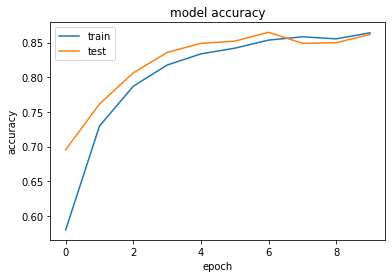

In [0]:
plot_accuracy(history_L)  


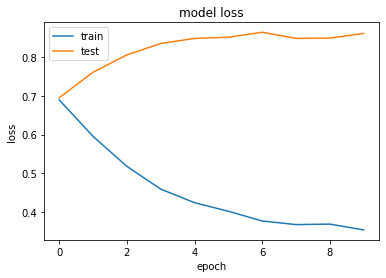

In [0]:
plot_loss(history_L)  


### Model Predictions. For your best performing model

Come up with ten sample sentences NOT part of the original data set. 
Use model.predict() to generate predictions and report positive or negative sentiment.

In [0]:
random_reviews = ['Movie was good but the ending was not coool',
                'lead actor was really worth spending of time',
                'Jess pink man nailed it',
                'Boring movie waste of time',
                'seriously how you can end a movie like this in worst ending',
                'seriously how you should watch this movie like this in best ending ever',
                'Movie plot was good but the actors did not performed well neutral reaction about this']
sequences = text_tk.texts_to_sequences(random_reviews)
padded = sequence.pad_sequences(sequences, maxlen=500)
predictions = model1.predict(padded)
for i in range(len(random_reviews)):
    if predictions[i]< 0.5:
        sentiment = 'Negative'
    else:
        sentiment = 'Positive'
    print(random_reviews[i], "-->", sentiment)

Movie was good but the ending was not coool --> Positive
lead actor was really worth spending of time --> Negative
Jess pink man nailed it --> Positive
Boring movie waste of time --> Negative
seriously how you can end a movie like this in worst ending --> Negative
seriously how you should watch this movie like this in best ending ever --> Positive
Movie plot was good but the actors did not performed well neutral reaction about this --> Positive


In [0]:
print('END')

END
